In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Input Data from SQL 

### Linear regression- Prediction between Runtime and Availability

#### Linear regression is a technique used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The linear regression model attempts to find the best linear relationship between the independent variables and the dependent variable.

In [3]:
df = pd.read_csv(r"C:\Users\15878\DA\SGD_Data.csv")
df

,Date,En_Name,Bg_Name,Plant_Name,Line_Name,Machine_Name,Shift,idle_Cycle_time,HT,MT,...,Run_Time,Down_Time,Total_Count,rejection,Good_Count,Operating_Time,Quality,Availability,Performance,OEE
0,01-01-2023,RANE,ZRAI-SGD,Plant 2,7 LPM,Makino 4,Shift1,145.0,0.000000,0.000000,...,0,509,0,0,0,509,0.000000,0.000000,0.000000,0.000000
1,01-01-2023,RANE,ZRAI-SGD,Plant 2,7 LPM,Makino 4,Shift2,0.0,0.000000,0.000000,...,0,270,0,0,0,270,0.000000,0.000000,0.000000,0.000000
2,01-01-2023,RANE,ZRAI-SGD,Plant 2,7 LPM,Makino 4,Shift2,145.0,0.000000,0.000000,...,0,208,0,0,0,208,0.000000,0.000000,0.000000,0.000000
3,01-01-2023,RANE,ZRAI-SGD,Plant 2,7 LPM,Makino 4,Shift3,0.0,0.000000,0.000000,...,0,30,0,0,0,30,0.000000,0.000000,0.000000,0.000000
4,01-01-2023,RANE,ZRAI-SGD,Plant 2,7 LPM,Makino 4,Shift3,145.0,27.500000,119.277778,...,196,144,72,4,68,358,94.444444,60.007446,80.961613,45.909578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,30-12-2022,RANE,ZRAI-SGD,Plant 2,7 LPM,Makino 4,Shift3,145.0,42.000000,90.000000,...,14,16,4,0,4,31,100.000000,47.120709,68.155112,32.115172
1206,30-12-2022,RANE,ZRAI-SGD,Plant 2,7 LPM,Makino 4,Shift3,150.0,49.269231,130.730769,...,314,8,118,4,114,340,96.610169,97.775486,88.895585,84.021226
1207,31-12-2022,RANE,ZRAI-SGD,Plant 2,7 LPM,Makino 4,Shift1,145.0,39.088235,176.058823,...,324,109,122,8,114,466,93.442623,70.332229,82.490091,59.137092
1208,31-12-2022,RANE,ZRAI-SGD,Plant 2,7 LPM,Makino 4,Shift2,145.0,47.500000,117.576923,...,241,199,98,8,90,465,91.836735,57.212986,88.996054,46.809426


In [28]:
df['Availability'].mean()

63.947361242292565

In [30]:
df['Run_Time'].sum()

227376

In [32]:
df['idle_Cycle_time'].mean()

139.08862876254182

In [ ]:
df['']

In [6]:
df.shape

(1210, 21)

In [26]:
df.corr()

,idle_Cycle_time,HT,MT,Stop_time,Run_Time,Down_Time,Total_Count,rejection,Good_Count,Operating_Time,Quality,Availability,Performance,OEE
idle_Cycle_time,1.000000,0.361301,0.336246,0.329991,0.306251,0.125443,0.354860,0.115793,0.353614,0.361610,0.298597,0.208226,0.019405,0.026204
HT,0.361301,1.000000,0.541456,0.507875,0.261067,-0.093326,0.311833,0.078085,0.312814,0.220906,0.602097,0.405264,-0.007585,0.011894
MT,0.336246,0.541456,1.000000,0.421145,0.428051,-0.143360,0.486803,0.103753,0.489889,0.334977,0.718077,0.548631,-0.010643,0.026827
Stop_time,0.329991,0.507875,0.421145,1.000000,0.541044,-0.078341,0.693066,0.181064,0.694603,0.514519,0.515380,0.523826,-0.058880,-0.048234
Run_Time,0.306251,0.261067,0.428051,0.541044,1.000000,-0.130353,0.749819,0.177313,0.753073,0.855355,0.520631,0.576643,-0.061546,-0.047943
Down_Time,0.125443,-0.093326,-0.143360,-0.078341,-0.130353,1.000000,-0.146167,0.073835,-0.156088,0.397888,-0.213405,-0.414485,0.012779,-0.046283
Total_Count,0.354860,0.311833,0.486803,0.693066,0.749819,-0.146167,1.000000,0.325494,0.996714,0.638516,0.627590,0.682269,-0.067681,-0.052423
rejection,0.115793,0.078085,0.103753,0.181064,0.177313,0.073835,0.325494,1.000000,0.247832,0.208325,0.064652,0.118090,-0.004595,-0.022939
Good_Count,0.353614,0.312814,0.489889,0.694603,0.753073,-0.156088,0.996714,0.247832,1.000000,0.636376,0.637489,0.688935,-0.068952,-0.051747
Operating_Time,0.361610,0.220906,0.334977,0.514519,0.855355,0.397888,0.638516,0.208325,0.636376,1.000000,0.387350,0.333418,-0.052241,-0.069913


In [13]:
df.shape
# There are missing values in the y column which is what we will predict 
df.isnull().sum()

Date                0
En_Name             0
Bg_Name             0
Plant_Name          0
Line_Name           0
Machine_Name        0
Shift              10
idle_Cycle_time     9
HT                  0
MT                  0
Stop_time           0
Run_Time            0
Down_Time           0
Total_Count         0
rejection           0
Good_Count          0
Operating_Time      0
Quality             0
Availability        0
Performance         0
OEE                 0
dtype: int64

In [14]:
df = df.dropna(how = 'any')

In [15]:
df.isnull().sum()

Date               0
En_Name            0
Bg_Name            0
Plant_Name         0
Line_Name          0
Machine_Name       0
Shift              0
idle_Cycle_time    0
HT                 0
MT                 0
Stop_time          0
Run_Time           0
Down_Time          0
Total_Count        0
rejection          0
Good_Count         0
Operating_Time     0
Quality            0
Availability       0
Performance        0
OEE                0
dtype: int64

In [16]:
df.shape

(1196, 21)

In [17]:
print(df.columns)

Index(['Date', 'En_Name', 'Bg_Name', 'Plant_Name', 'Line_Name', 'Machine_Name',
       'Shift', 'idle_Cycle_time', 'HT', 'MT', 'Stop_time', 'Run_Time',
       'Down_Time', 'Total_Count', 'rejection', 'Good_Count', 'Operating_Time',
       'Quality', 'Availability', 'Performance', 'OEE'],
      dtype='object')


In [18]:
X = df.loc[:, ['Run_Time']].values

In [19]:
X.shape

(1196, 1)

### y = Dependant variable

In [20]:
y = df.loc[:, 'Availability'].values
y.shape

(1196,)

In [21]:
reg = LinearRegression(fit_intercept=True)

In [22]:
reg.fit(X,y)

LinearRegression()

In [23]:
reg.predict(X[0].reshape(-1,1))

array([30.74756533])

In [24]:
reg.predict(X[0:10])

array([30.74756533, 30.74756533, 30.74756533, 30.74756533, 64.97529103,
       73.3575912 , 35.81187169, 75.80242875, 43.84490935, 30.74756533])

In [25]:
score = reg.score(X, y)
print(score)

0.49978175642008305


In [49]:
reg.coef_
reg.intercept_
m = reg.coef_[0]

b = reg.intercept_
print(m,b)

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

0.174631253547992 30.747565333657008
formula: y = 0.17x + 30.75


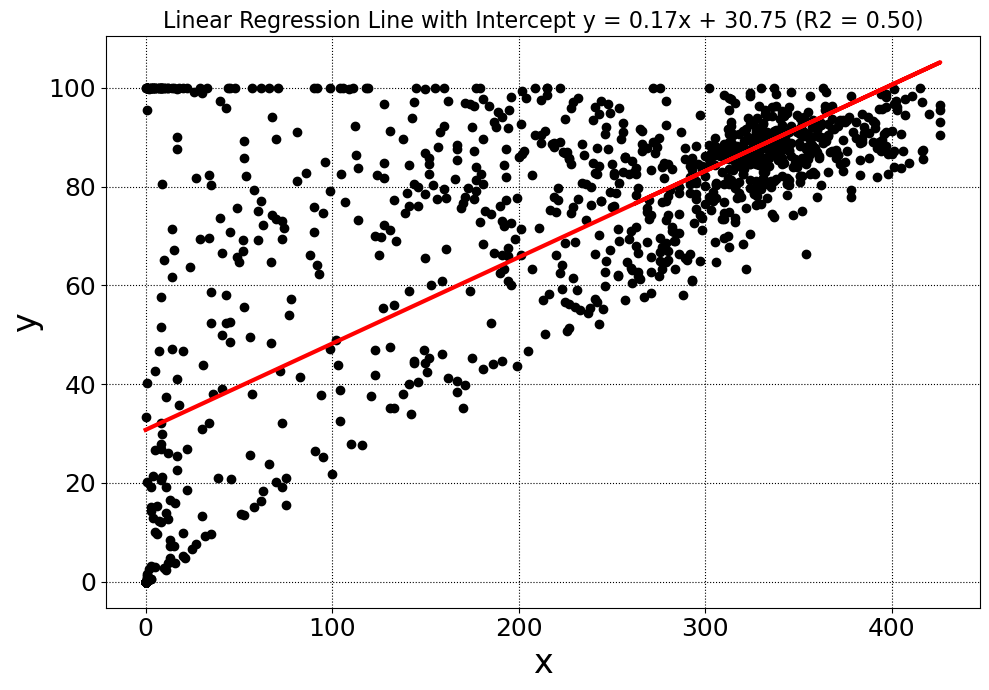

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 24)
ax.set_ylabel('y', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()

In [29]:
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)
print(score_inter)

0.49978175642008305


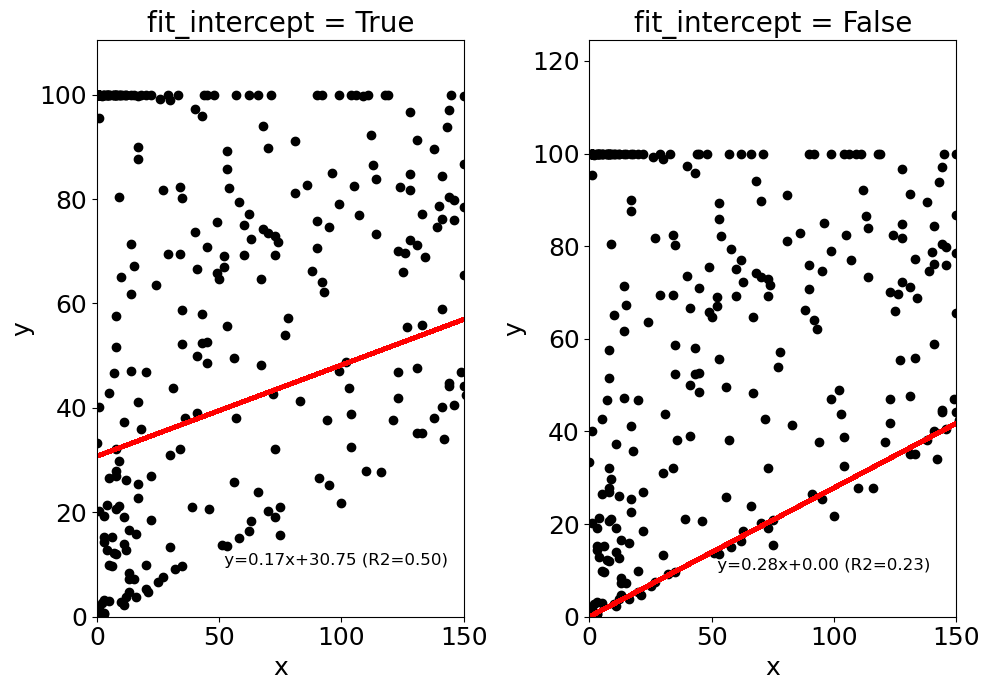

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    ax[index].set_xlim(left = 0, right = 150)
    ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

### Down_Time vs Availability

In [32]:
X = df.loc[:, ['Down_Time']].values
X

array([[509],
       [270],
       [208],
       ...,
       [109],
       [199],
       [ 62]], dtype=int64)

In [33]:
y = df.loc[:, 'Availability'].values

In [34]:
reg = LinearRegression(fit_intercept=True)

In [35]:
reg.fit(X,y)

LinearRegression()

In [36]:
reg.predict(X[0].reshape(-1,1))

array([3.48580473])

In [37]:
reg.predict(X[0:10])

array([ 3.48580473, 37.05065148, 45.75785023, 70.75593693, 54.74592634,
       73.8455881 , 72.72207858, 53.34153945, 26.09643371,  8.68203623])

In [38]:
score = reg.score(X, y)
print(score)

0.1755812152393521


In [39]:
reg.coef_
reg.intercept_
m = reg.coef_[0]

b = reg.intercept_
print(m)
print(b)

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

-0.14043868936847104
74.9690976136913
formula: y = -0.14x + 74.97


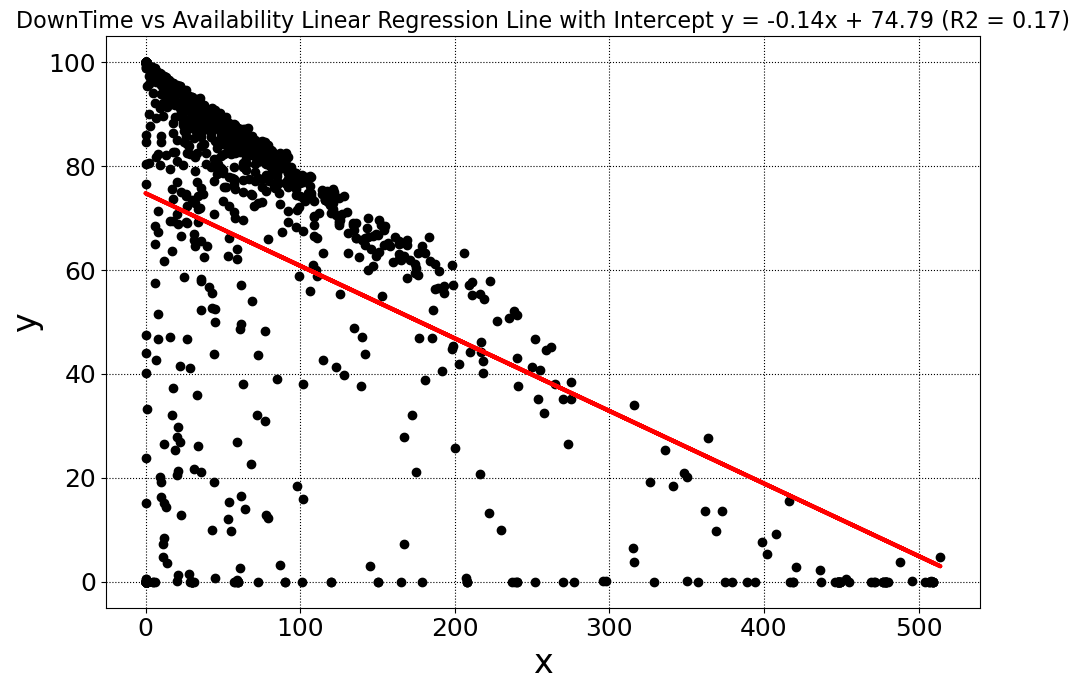

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 24)
ax.set_ylabel('y', fontsize = 24)
ax.set_title("DownTime vs Availability Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()

In [50]:
X = df.loc[:, ['Availability']].values
X

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [70.33222918],
       [57.21298552],
       [83.66616595]])

In [51]:
y = df.loc[:, 'Down_Time'].values

In [52]:
reg = LinearRegression(fit_intercept=True)

In [53]:
reg.fit(X,y)

LinearRegression()

In [54]:
reg.predict(X[0].reshape(-1,1))

array([158.42993031])

In [55]:
reg.predict(X[0:10])

array([158.42993031, 158.42993031, 158.42993031, 158.42993031,
        83.40658538,  36.78125069,  71.57974685,  77.47035007,
       132.26147128, 158.42993031])

In [56]:
score = reg.score(X, y)
print(score)

0.175581215239352


In [57]:
reg.coef_
reg.intercept_
m = reg.coef_[0]

b = reg.intercept_
print(m)
print(b)

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

-1.2502339350282388
158.42993031139304
formula: y = -1.25x + 158.43


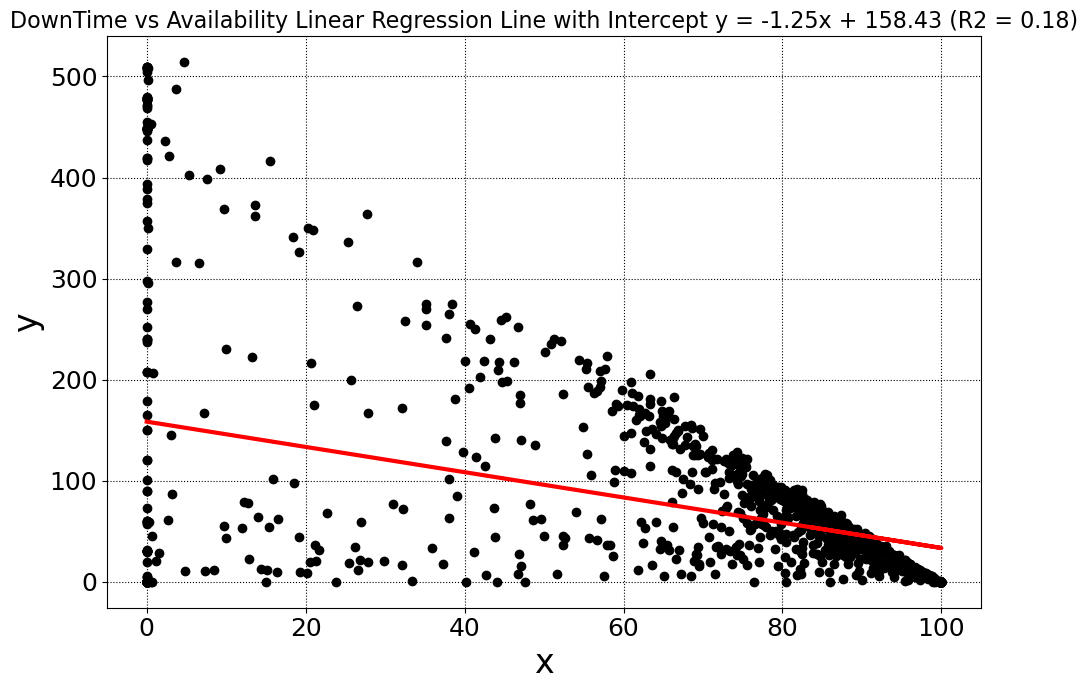

In [58]:

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 24)
ax.set_ylabel('y', fontsize = 24)
ax.set_title("DownTime vs Availability Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()

### Operating Time Vs Availability

In [18]:
X = df.loc[:, ['Operating_Time']].values
X

array([[509],
       [270],
       [208],
       ...,
       [466],
       [465],
       [378]], dtype=int64)

In [35]:
y = df.loc[:, 'Availability'].values

In [36]:
reg = LinearRegression(fit_intercept=True)

In [37]:
reg.fit(X,y)

LinearRegression()

In [38]:
reg.predict(X[0:10])

array([76.98917411, 63.05696516, 59.44275196, 49.06646245, 68.18681616,
       64.16454663, 50.29063144, 72.67543578, 72.96690458, 74.83230494])

In [39]:
score = reg.score(X, y)
print(score)

0.11116784872395857


In [40]:
reg.coef_
reg.intercept_
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = 0.06x + 47.32


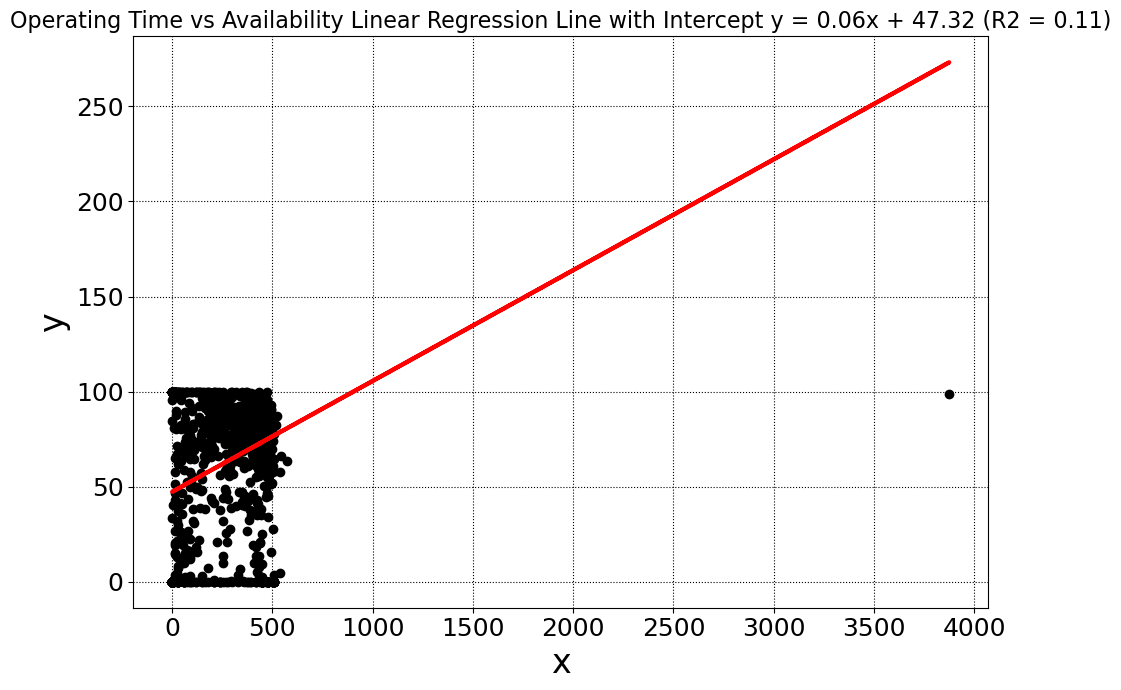

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 24)
ax.set_ylabel('y', fontsize = 24)
ax.set_title("Operating Time vs Availability Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()

## Impact of Prediction Score

### The prediction score ranges from 0 to 1, with a higher score indicating a better fit between the model and the data. A score of 1 indicates a perfect fit, where all of the variability in the dependent variable is explained by the independent variables in the model. A score of 0 indicates that the model does not explain any of the variability in the dependent variable.